<a href="https://colab.research.google.com/github/Tejash-Pathak/Python-Learning/blob/main/My_Regression_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejashpathak","key":"af2f48abee95de31e179d994ef426e01"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! pip install kaggle # Install the Kaggle library
! mkdir ~/.kaggle # Make a directory named “.kaggle”
! cp kaggle.json ~/.kaggle/ # Copy the “kaggle.json” into this new directory
! chmod 600 ~/.kaggle/kaggle.json # Allocate the required permission for this file.
! kaggle competitions download <name-of-competition> # Downloading Competitions dataset
! kaggle datasets download <name-of-dataset> # Downloading Datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: ` kaggle competitions download <name-of-competition> # Downloading Competitions dataset'
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: ` kaggle datasets download <name-of-dataset> # Downloading Datasets'


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d house-prices-advanced-regression-techniques

403 - Forbidden


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 44.3MB/s]


In [ ]:
!sudo apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!unzip  house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

In [ ]:
raw_house_train_data= pd.read_csv('train.csv', delimiter = ',', encoding= 'unicode_escape')

In [ ]:
raw_house_train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
house_train_data = raw_house_train_data.copy()

print(house_train_data.SaleCondition.unique())
house_train_data['MSZoning'] = house_train_data['MSZoning'].map({
    'RL': 0,
    'RM': 1,
    'C (all)': 2,
    'FV': 3,
    'RH': 4
})
house_train_data['Street'] = house_train_data['Street'].map({'Pave': 0, 'Grvl': 1})
house_train_data['Alley'] = house_train_data['Alley'].map({np.nan: 0, 'Pave': 1, 'Grvl': 2})
house_train_data['LotShape'] = house_train_data['LotShape'].map({
    'Reg': 0,
    'IR1': 1,
    'IR2': 2,
    'IR3': 3
})
house_train_data['LandContour'] = house_train_data['LandContour'].map({'Lvl': 0, 'Bnk': 1, 'Low': 2, 'HLS': 3})
house_train_data['Utilities'] = house_train_data['Utilities'].map({'AllPub': 0, 'NoSeWa': 1})
Y = house_train_data['SalePrice']
house_train_data['LotConfig'] = house_train_data['LotConfig'].map({
    'Inside': 0,
    'FR2': 1,
    'Corner': 2,
    'CulDSac': 3,
    'FR3': 4
})
house_train_data['LandSlope'] = house_train_data['LandSlope'].map(
    {
        'Glt': 0,
        'Mod': 1,
        'Sev': 2
    }
)
house_train_data.Neighborhood = house_train_data.Neighborhood.map({
    'CollgCr': 0,
    'Veenker': 1,
    'Crawfor': 2,
    'NoRidge': 3,
    'Mitchel': 4,
    'Somerst': 5,
    'NWAmes': 6,
    'OldTown': 7,
    'BrkSide': 8,
    'Sawyer': 9,
    'NridgHt': 10,
    'NAmes': 11,
    'SawyerW':12,
    'IDOTRR': 13,
    'MeadowV': 14,
    'Edwards': 15,
    'Timber': 16,
    'Gilbert': 17,
    'StoneBr': 18,
    'ClearCr': 19,
    'NPkVill': 20,
    'Blmngtn': 21,
    'BrDale': 22,
    'SWISU': 23,
    'Blueste': 24
})
house_train_data.Condition1 = house_train_data.Condition1.map({
    'Norm': 0,
    'Feedr': 1,
    'PosN': 2,
    'Artery': 3,
    'RRAe': 4,
    'RRNn': 5,
    'RRAn': 6,
    'PosA': 7,
    'RRNe': 8,
})
house_train_data.Condition2 = house_train_data.Condition2.map({
    'Norm': 0,
    'Feedr': 1,
    'PosN': 2,
    'Artery': 3,
    'RRAe': 4,
    'RRNn': 5,
    'RRAn': 6,
    'PosA': 7,
})
house_train_data.BldgType = house_train_data.BldgType.map({
    '1Fam': 0,
    '2fmCon': 1,
    'Duplex': 2,
    'TwnhsE': 3,
    'Twnhs': 4,
})
house_train_data.HouseStyle = house_train_data.HouseStyle.map({
    '2Story': 0,
    '1Story': 1,
    '1.5Fin': 2,
    '1.5Unf': 3,
    'SFoyer': 4,
    'SLvl': 5,
    '2.5Unf': 6,
    '2.5Fin': 7,
})
house_train_data.RoofStyle = house_train_data.RoofStyle.map({
    'Gable': 0,
    'Hip': 1,
    'Gambrel': 2,
    'Mansard': 3,
    'Flat': 4,
    'Shed': 5,
})
house_train_data.RoofMatl = house_train_data.RoofMatl.map({
    'CompShg': 0,
    'WdShngl': 1,
    'Metal': 2,
    'WdShake': 3,
    'Membran': 4,
    'Tar&Grv': 5,
    'Roll': 6,
    'ClyTile': 7,
})
house_train_data.Exterior1st = house_train_data.Exterior1st.map({
    'VinylSd': 0,
    'MetalSd': 1,
    'Wd Sdng': 2,
    'HdBoard': 3,
    'BrkFace': 4,
    'WdShing': 5,
    'CemntBd': 6,
    'Plywood': 7,
    'AsbShng': 8,
    'Stucco': 9,
    'BrkComm': 10,
    'AsphShn': 11,
    'Stone':12,
    'ImStucc': 13,
    'CBlock': 14,
})
house_train_data.Exterior2nd = house_train_data.Exterior2nd.map({
    'VinylSd': 0,
    'MetalSd': 1,
    'Wd Sdng': 2,
    'HdBoard': 3,
    'BrkFace': 4,
    'Wd Shng': 5,
    'CmentBd': 6,
    'Plywood': 7,
    'AsbShng': 8,
    'Stucco': 9,
    'Brk Cmn': 10,
    'AsphShn': 11,
    'Stone':12,
    'ImStucc': 13,
    'CBlock': 14,
    'Other': 15
})
house_train_data.MasVnrType = house_train_data.MasVnrType.map({
    np.nan: 0,
    'None': 1,
    'Stone': 2,
    'BrkCmn': 3,
    'BrkFace': 4,
})
house_train_data.ExterQual = house_train_data.ExterQual.map({
    'Gd': 0,
    'TA': 1,
    'Ex': 2,
    'Fa': 3,
})
house_train_data.ExterCond = house_train_data.ExterCond.map({
    'Gd': 0,
    'TA': 1,
    'Ex': 2,
    'Fa': 3,
    'Po': 4
})
house_train_data.Foundation = house_train_data.Foundation.map({
    'PConc': 0,
    'CBlock': 1,
    'BrkTil': 2,
    'Wood': 3,
    'Slab': 4,
    'Stone': 5
})
house_train_data.BsmtQual = house_train_data.BsmtQual.map({
    np.nan: 0,
    'Gd': 1,
    'TA': 2,
    'Ex': 3,
    'Fa': 4,
})
house_train_data.BsmtCond = house_train_data.BsmtCond.map({
    np.nan: 0,
    'Gd': 1,
    'TA': 2,
    'Po': 3,
    'Fa': 4,
})
house_train_data.BsmtExposure = house_train_data.BsmtExposure.map({
    np.nan: 0,
    'Gd': 1,
    'No': 2,
    'Mn': 3,
    'Av': 4,
})
house_train_data.BsmtFinType1 = house_train_data.BsmtFinType1.map({
    np.nan: 0,
    'GLQ': 1,
    'ALQ': 2,
    'Unf': 3,
    'BLQ': 4,
    'LwQ': 5
})
house_train_data.BsmtFinType2 = house_train_data.BsmtFinType2.map({
    np.nan: 0,
    'GLQ': 1,
    'ALQ': 2,
    'Unf': 3,
    'BLQ': 4,
    'LwQ': 5,
    'Rec': 6
})
house_train_data.Heating = house_train_data.Heating.map({
    'GasA': 0,
    'GasW': 1,
    'Grav': 2,
    'Wall': 3,
    'OthW': 4,
    'Floor': 5
})
house_train_data.HeatingQC = house_train_data.HeatingQC.map({
    'Po': 0,
    'Gd': 1,
    'TA': 2,
    'Ex': 3,
    'Fa': 4,
})
house_train_data.CentralAir = house_train_data.CentralAir.map({
    'Y': 0,
    'N': 1,
})
house_train_data.Electrical = house_train_data.Electrical.map({
    np.nan: 0,
    'SBrkr': 1,
    'FuseF': 2,
    'FuseA': 3,
    'FuseP': 4,
    'Mix': 5
})
house_train_data.KitchenQual = house_train_data.KitchenQual.map({
    'Gd': 0,
    'TA': 1,
    'Ex': 2,
    'Fa': 3,
})
house_train_data.Functional = house_train_data.Functional.map({
    'Typ': 0,
    'Min1': 1,
    'Maj1': 2,
    'Min2': 3,
    'Mod': 4,
    'Maj2': 5,
    'Sev': 6
})
house_train_data.FireplaceQu = house_train_data.FireplaceQu.map({
    np.nan: 0,
    'TA': 1,
    'Gd': 2,
    'Fa': 3,
    'Ex': 4,
    'Po': 5
})
house_train_data.GarageType = house_train_data.GarageType.map({
    np.nan: 0,
    'Attchd': 1,
    'Detchd': 2,
    'BuiltIn': 3,
    'CarPort': 4,
    'Basment': 5,
    '2Types': 6
})
house_train_data.GarageFinish = house_train_data.GarageFinish.map({
    np.nan: 0,
    'RFn': 1,
    'Unf': 2,
    'Fin': 3,
})
house_train_data.GarageQual = house_train_data.GarageQual.map({
    np.nan: 0,
    'TA': 1,
    'Fa': 2,
    'Gd': 3,
    'Ex': 4,
    'Po': 5
})
house_train_data.GarageCond = house_train_data.GarageCond.map({
    np.nan: 0,
    'TA': 1,
    'Fa': 2,
    'Gd': 3,
    'Ex': 4,
    'Po': 5
})
house_train_data.PavedDrive = house_train_data.PavedDrive.map({
    'Y': 0,
    'N': 1,
    'P': 2
})
house_train_data.PoolQC = house_train_data.PoolQC.map({
    np.nan: 0,
    'Ex': 1,
    'Fa': 2,
    'Gd': 3,
})
house_train_data.Fence = house_train_data.Fence.map({
    np.nan: 0,
    'MnPrv': 1,
    'GdWo': 2,
    'GdPrv': 3,
    'MnWw': 4
})
house_train_data.MiscFeature = house_train_data.MiscFeature.map({
    np.nan: 0,
    'Shed': 1,
    'Gar2': 2,
    'Othr': 3,
    'TenC': 4
})
house_train_data.SaleType = house_train_data.SaleType.map({
    'WD': 0,
    'New': 1,
    'COD': 2,
    'ConLD': 3,
    'ConLI': 4,
    'CWD': 5,
    'ConLw': 6,
    'Con': 7,
    'Oth': 8
})
house_train_data.SaleCondition = house_train_data.SaleCondition.map({
    'Normal': 0,
    'Abnorml': 1,
    'Partial': 2,
    'AdjLand': 3,
    'Alloca': 4,
    'Family': 5
})
house_train_data.LotFrontage.map({np.nan:0})

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1455   NaN
1456   NaN
1457   NaN
1458   NaN
1459   NaN
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
X_names = []
for index in range(81):
  if house_train_data.columns[index] != 'SalePrice':
    if house_train_data.columns[index] != 'Id':
      X_names.append(house_train_data.columns[index])
print(X_names)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [ ]:
for index in range(81):
  key = house_train_data.columns[index]
  try:
    f = house_train_data[key].unique().astype(float)
  except ValueError:
    print(house_train_data[key].unique())


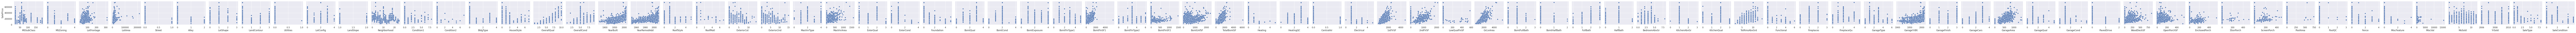

In [ ]:
sns.pairplot(house_train_data, x_vars = X_names, y_vars=['SalePrice'])

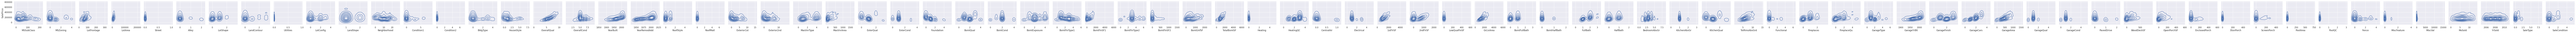

In [ ]:
sns.pairplot(house_train_data.astype(float), x_vars = X_names, y_vars=['SalePrice'], kind = 'kde')

In [ ]:
import pandas as pd
df1 = house_train_data.iloc[:,:80]

X = df1.iloc[:,1:].astype(float)

Y = house_train_data.iloc[0:,80:].astype(float)
print(X)
print(Y)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0           60.0       0.0         65.0   8450.0     0.0    0.0       0.0   
1           20.0       0.0         80.0   9600.0     0.0    0.0       0.0   
2           60.0       0.0         68.0  11250.0     0.0    0.0       1.0   
3           70.0       0.0         60.0   9550.0     0.0    0.0       1.0   
4           60.0       0.0         84.0  14260.0     0.0    0.0       1.0   
...          ...       ...          ...      ...     ...    ...       ...   
1455        60.0       0.0         62.0   7917.0     0.0    0.0       0.0   
1456        20.0       0.0         85.0  13175.0     0.0    0.0       0.0   
1457        70.0       0.0         66.0   9042.0     0.0    0.0       0.0   
1458        20.0       0.0         68.0   9717.0     0.0    0.0       0.0   
1459        20.0       0.0         75.0   9937.0     0.0    0.0       0.0   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC

In [ ]:
X = sm.add_constant(X)
X.fillna(0.)
Y = np.array(Y)
Y.reshape(-1, 1)
# Model = sm.OLS(Y,X.astype(float)).fit()
# Model.summary()

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [ ]:
X.head()

const  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0    1.0        60.0       0.0         65.0   8450.0     0.0    0.0       0.0   
1    1.0        20.0       0.0         80.0   9600.0     0.0    0.0       0.0   
2    1.0        60.0       0.0         68.0  11250.0     0.0    0.0       1.0   
3    1.0        70.0       0.0         60.0   9550.0     0.0    0.0       1.0   
4    1.0        60.0       0.0         84.0  14260.0     0.0    0.0       1.0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0          0.0        0.0  ...          0.0       0.0     0.0    0.0   
1          0.0        0.0  ...          0.0       0.0     0.0    0.0   
2          0.0        0.0  ...          0.0       0.0     0.0    0.0   
3          0.0        0.0  ...          0.0       0.0     0.0    0.0   
4          0.0        0.0  ...          0.0       0.0     0.0    0.0   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0          0.0      0.0     2.0  2008.0       0.0            0.0  
1          0.0      0.0     5.0  2007.0       0.0            0.0  
2          0.0      0.0     9.0  2008.0       0.0            0.0  
3          0.0      0.0     2.0  2006.0       0.0            1.0  
4          0.0      0.0    12.0  2008.0       0.0            0.0  

[5 rows x 80 columns]

In [ ]:
fig, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(house_train_data.corr(), cmap="YlGnBu", annot = True, ax=ax)
plt.show()

In [ ]:
for col in house_train_data.corr().columns:
  for row in house_train_data.corr()[col].index:
    for correlation in house_train_data.corr()[col]:
      if correlation >= 0.7:
        if correlation != 1:
          print(f"{col} and {row} have a correlation of {correlation} and  may have multicollinearity")

MSSubClass and Id have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and MSSubClass have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and MSZoning have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and LotFrontage have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and LotArea have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and Street have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and Alley have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and LotShape have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and LandContour have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and Utilities have a correlation of 0.7708396619425061 and  may have multicollinearity
MSSubClass and LotConfig have a c

In [ ]:
na_names = []
for na in X.isna().sum():
  for row in X.columns:
    if na > 0:
      na_names.append(row)

In [ ]:
!pip install git+https://github.com/AnotherSamWilson/miceforest.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AnotherSamWilson/miceforest.git to /tmp/pip-req-build-jdrltt02
  Running command git clone --filter=blob:none --quiet https://github.com/AnotherSamWilson/miceforest.git /tmp/pip-req-build-jdrltt02
  Resolved https://github.com/AnotherSamWilson/miceforest.git to commit d9359a89204e3b5f10cc02e7e621a22c213e5453
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.5 MB/s eta 0:00:00
  Created wheel for miceforest: filename=miceforest-5.6.3-py3-none-any.whl size=52057 sha256=57c32abf87cd1b3cd317fc7ac77e7968330cba22357852492088a71cf73d57e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-8kd7bezy/wheels/7c/62/15/e3f46a49370b2889710e9cd328541e7d57c94a9d813ea3caed
Successfully built miceforest


In [ ]:
# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=100, max_iter=10)
from sklearn.metrics import mean_squared_error
import miceforest as mf
# Create kernel. 
kds = mf.ImputationKernel(
  X,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
df_imputed = kds.complete_data()
print(df_imputed)
X.drop(['LotFrontage'], axis=1)
X = sm.add_constant(X)
X.fillna(0.)
print(X)

Y = np.array(Y)
Y.reshape(-1, 1)
for na in X.isna().sum():
  for row in X.columns:
    if na > 0:
      X[row].fillna(0.0)
for Column in X.columns:
  for value in X[Column]:
    if value == np.nan:
      X[Column][value] = 0.0
Model = sm.OLS(Y,df_imputed.astype(float)).fit()
Model.summary()

      const  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0       1.0        60.0       0.0         65.0   8450.0     0.0    0.0   
1       1.0        20.0       0.0         80.0   9600.0     0.0    0.0   
2       1.0        60.0       0.0         68.0  11250.0     0.0    0.0   
3       1.0        70.0       0.0         60.0   9550.0     0.0    0.0   
4       1.0        60.0       0.0         84.0  14260.0     0.0    0.0   
...     ...         ...       ...          ...      ...     ...    ...   
1455    1.0        60.0       0.0         62.0   7917.0     0.0    0.0   
1456    1.0        20.0       0.0         85.0  13175.0     0.0    0.0   
1457    1.0        70.0       0.0         66.0   9042.0     0.0    0.0   
1458    1.0        20.0       0.0         68.0   9717.0     0.0    0.0   
1459    1.0        20.0       0.0         75.0   9937.0     0.0    0.0   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0          0.0          0.0      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     112.1
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:37:05   Log-Likelihood:                -17098.
No. Observations:                1460   AIC:                         3.435e+04
Df Residuals:                    1382   BIC:                         3.476e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.059e+05   1.27e+06     -0.557      0.578   -3.19e+06    1.78e+06
MSSubClass      -43.6467     43.354     -1.007      0.314    -128.694      41.401
MSZoning       -140.1406   1186.928     -0.118      0.906   -2468.516    2188.235
LotFrontage     -77.3254     46.770     -1.653      0.098    -169.074      14.423
LotArea           0.4733      0.100      4.731      0.000       0.277       0.670
Street        -2.744e+04   1.34e+04     -2.047      0.041   -5.37e+04   -1141.029
Alley         -3085.3561   2290.314     -1.347      0.178   -7578.224    1407.512
LotShape       1102.1255   1628.932      0.677      0.499   -2093.320    4297.572
LandContour    3357.1003   1360.429      2.468      0.014     688.372    6025.829
Utilities     -5.536e+04   3.19e+04     -1.733      0.083   -1.18e+05    7298.891
LotConfig      1108.0239    856.081      1.294      0.196    -571.335    2787.383
LandSlope     -2528.6534   3440.939     -0.735      0.463   -9278.682    4221.375
Neighborhood   -316.4410    156.970     -2.016      0.044    -624.366      -8.516
Condition1    -3040.2325    686.070     -4.431      0.000   -4386.083   -1694.382
Condition2    -5363.9308   2419.967     -2.217      0.027   -1.01e+04    -616.724
BldgType      -3687.4170   1711.998     -2.154      0.031   -7045.813    -329.021
HouseStyle     1124.0554    775.713      1.449      0.148    -397.646    2645.757
OverallQual    1.345e+04   1089.610     12.347      0.000    1.13e+04    1.56e+04
OverallCond    7014.9578   1023.915      6.851      0.000    5006.363    9023.553
YearBuilt       425.2045     75.319      5.645      0.000     277.452     572.957
YearRemodAdd    145.7277     64.278      2.267      0.024      19.635     271.820
RoofStyle      4357.4027   1651.235      2.639      0.008    1118.204    7596.601
RoofMatl      -6927.8042   1951.374     -3.550      0.000   -1.08e+04   -3099.830
Exterior1st    -439.7485    652.298     -0.674      0.500   -1719.349     839.852
Exterior2nd       6.1322    568.099      0.011      0.991   -1108.297    1120.561
MasVnrType    -4355.8569    829.171     -5.253      0.000   -5982.428   -2729.286
MasVnrArea       44.8280      6.731      6.660      0.000      31.623      58.033
ExterQual      1130.0813   1934.598      0.584      0.559   -2664.985    4925.147
ExterCond      3867.3517   2116.761      1.827      0.068    -285.061    8019.765
Foundation    -1943.9947   1468.695     -1.324      0.186   -4825.108     937.119
BsmtQual       8102.2071   1368.095      5.922      0.000    5418.439    1.08e+04
BsmtCond      -3408.7852   1984.272     -1.718      0.086   -7301.296     483.726
BsmtExposure  -1304.5665    996.942     -1.309      0.191   -3260.250     651.117
BsmtFinType1  -2139.4708    858.481     -2.492      0.013   -3823.538    -455.404
BsmtFinSF1        6.6436      2.505      2.652   

## $VIF = \frac{1}{1 - R^2}$
# Variance Inflation Factor
### It is another way to detect multi-collinearity. it works by taking all the independent x's except one which is taken as a dependent y and a regression is run and the $R^2$ of the regression shows if the x is explained by the other X's

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(df_imputed.columns)):
  if variance_inflation_factor(df_imputed.values, i) != np.inf:
    print(df_imputed.columns[i], variance_inflation_factor(df_imputed.values, i))

const 2553519.22446826
MSSubClass 5.338180772709059
MSZoning 1.425029012316211
LotFrontage 2.01223594120061
LotArea 1.583066025479872
Street 1.168414436184376
Alley 1.297554762138128
LotShape 1.4279950847105876
LandContour 1.2107894614929078
Utilities 1.1090962559050797
LotConfig 1.1874466071891134
LandSlope 2.315838401444927
Neighborhood 1.3327918470450577
Condition1 1.0912892381478991
Condition2 1.1577959531662074
BldgType 5.307252273135033
HouseStyle 1.6761213593669553
OverallQual 3.6042735591924906
OverallCond 2.060602919233534
YearBuilt 8.213732254742485
YearRemodAdd 2.7951193412051403
RoofStyle 1.6203788290453813
RoofMatl 1.759795227136924
Exterior1st 4.24488854960771
Exterior2nd 4.139575366335069
MasVnrType 2.0123850385965136
MasVnrArea 2.3491512602243327
ExterQual 1.9624180942295077
ExterCond 1.2925321268872507
Foundation 2.365286958962247
BsmtQual 1.7410775357560953
BsmtCond 1.6854299232057481
BsmtExposure 1.2996410738583446
BsmtFinType1 1.9360934512696415
BsmtFinType2 1.57759

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Heating 1.3657322949331598
HeatingQC 1.2842002670312112
CentralAir 1.7611604359195592
Electrical 1.3418834884844035
BsmtFullBath 2.460652116549323
BsmtHalfBath 1.2189012766434835
FullBath 3.1735632446970845
HalfBath 2.3124340088449595
BedroomAbvGr 2.518398671518498
KitchenAbvGr 1.815725045778058
KitchenQual 1.6695699983590402
TotRmsAbvGrd 5.394389552926611
Functional 1.2352826632040528
Fireplaces 2.9560130010574728
FireplaceQu 2.3423123013078313
GarageType 1.4737036398882684
GarageYrBlt 5.029639821561883
GarageFinish 1.4691915664891466
GarageCars 6.230839072698569
GarageArea 6.230746096190198
GarageQual 2.5979165717293635
GarageCond 2.472723582801381
PavedDrive 1.3394356899644606
WoodDeckSF 1.2764202719913522
OpenPorchSF 1.315121084729354
EnclosedPorch 1.3430343666137763
3SsnPorch 1.0494097497269297
ScreenPorch 1.1693410009396024
PoolArea 9.864974676179008
PoolQC 10.172000771984829
Fence 1.1941129315201697
MiscFeature 1.623845789894132
MiscVal 1.535034672857716
MoSold 1.082801854189171

# Auto-Correlation
###If the current data is explained by past data then the data is said to be auto (self) correlated. It is usually shown in time series data